# SLFs and heterogeneous freezing rates
Does settings the number and/or mass tendencies to zero account for NorESM/CESM differences?

In [3]:
import sys
# Add common resources folder to path
sys.path.append("/mnt/mcc-ns9600k/jonahks/git_repos/netcdf_analysis/Common/")
sys.path.append("/mnt/mcc-ns9600k/jonahks/git_repos/netcdf_analysis/")
sys.path.append("/home/jonahks/git_repos/netcdf_analysis/")
sys.path.append("/home/jonahks/git_repos/netcdf_analysis/Common/")

from imports import (
    pd, np, xr, mpl, plt, sns, os, 
    datetime, sys, crt, gridspec,
    polyfit, ccrs, LinearRegression, metrics,
    datetime
    )

from functions import (
    masked_average, plot_slf_isotherms,
    season_mean, add_weights
    )

from classes import CT_SLF_Metric

%matplotlib inline

In [2]:
host = os.uname()[1]
if 'jupyter' in host.split('-'): # Check if running on NIRD through the Jupyter Hub
    print('Running through MC2 Jupyter Hub')
    model_dir = '/mnt/mcc-ns9600k/jonahks/'
    os.chdir(model_dir)

else:  # Assume that we're running on a local machine and mounting NIRD
    print('Running on %s, attempting to mount ns9600k/jonahks/ from NIRD' % str(host))
    os.system('fusermount -zu ~/drivemount/')  # unmount first
    os.system('sshfs jonahks@login.nird.sigma2.no:"p/jonahks/" ~/drivemount/')    # Calling mountnird from .bashrc doesn't work
    os.chdir('/home/jonahks/drivemount/')
    save_dir = '~/DATAOUT/'
    save_to = os.path.expanduser(save_dir)

Running through MC2 Jupyter Hub


## Set/check directories

In [6]:
case_dir = 'inp_validation/'

# Check that each important directory can be accessed:    
access_paths = os.path.exists(case_dir) #and os.path.exists(top_obs_dir) and os.path.exists(output_dir)
print('Can access all directory paths:', access_paths)

Can access all directory paths: True


In [8]:
files = os.listdir(case_dir)
files.sort()
files

['20200109_nfclimo_f19tn14',
 '20200128_142110_singleparam_frzrtvarsm1_wbf_1_inp_1',
 '20200128_142303_singleparam_frzrtvarsm15_wbf_1_inp_1',
 '20200128_162401_singleparam_altINPm1_wbf_1_inp_1',
 '20200128_162401_singleparam_altINPm1_wbf_1_inp_100',
 '20200131_120716_singleparam_nimaxmod_wbf_1_inp_100',
 '20200131_120822_singleparam_nimaxmod_wbf_1_inp_1',
 '20200207_145043_singleparam_icenucmod_wbf_1_inp_1',
 '20200207_145043_singleparam_icenucmod_wbf_1_inp_10',
 '20200207_145043_singleparam_icenucmod_wbf_1_inp_1020200207_145043_singleparam_icenucmod_wbf_1_inp_10_slf_comparison.png',
 '20200207_145043_singleparam_icenucmod_wbf_1_inp_1020200207_145043_singleparam_icenucmod_wbf_1_inp_10cloudtop_slf_comparison.csv',
 '20200207_145043_singleparam_icenucmod_wbf_1_inp_120200207_145043_singleparam_icenucmod_wbf_1_inp_1_slf_comparison.png',
 '20200207_145043_singleparam_icenucmod_wbf_1_inp_120200207_145043_singleparam_icenucmod_wbf_1_inp_1cloudtop_slf_comparison.csv',
 '20200218_112948_singlep

In [17]:
mainmetric = CT_SLF_Metric(case_dir)

mainmetric.add_case('20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1', label="NorESM2 normal", path='satcomp/')
mainmetric.add_case('CESM2_slfvars', label="CESM2 normal", path='satcomp/')

mainmetric.add_case('20200606_morn_CESM2_nohet_wbf_1_inp_1', label="CESM2 no Het. Frz")
mainmetric.add_case('20200606_morn_NORESM2_nohet_wbf_1_inp_1', label="NorESM2 no Het. Frz")
mainmetric.add_case('20200607_noon_CESM2_nonumhet_wbf_1_inp_1', label="CESM2 no num Het. Frz")
mainmetric.add_case('20200607_noon_NorESM2_nonumhet_wbf_1_inp_1', label="NorESM2 no num Het. Frz")

Trying to load concatenated file for 20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Trying to load concatenated file for CESM2_slfvars


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Trying to load concatenated file for 20200606_morn_CESM2_nohet_wbf_1_inp_1


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Trying to load concatenated file for 20200606_morn_NORESM2_nohet_wbf_1_inp_1
Trying to load concatenated file for 20200607_noon_CESM2_nonumhet_wbf_1_inp_1
Trying to load concatenated file for 20200607_noon_NorESM2_nonumhet_wbf_1_inp_1


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


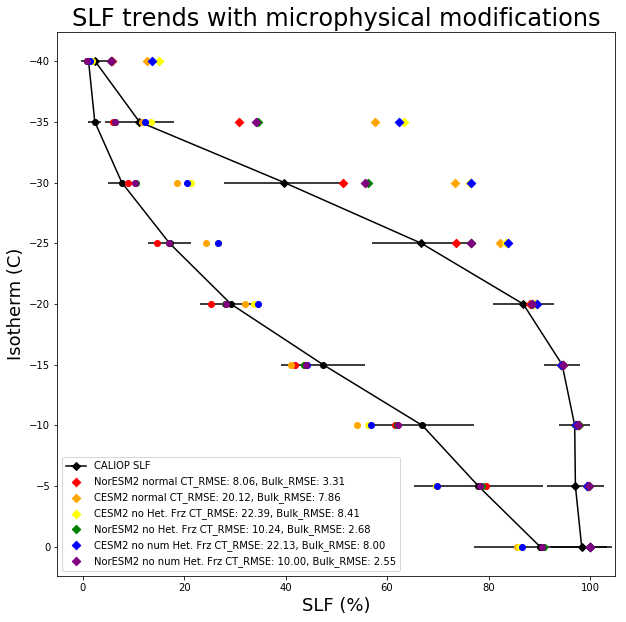

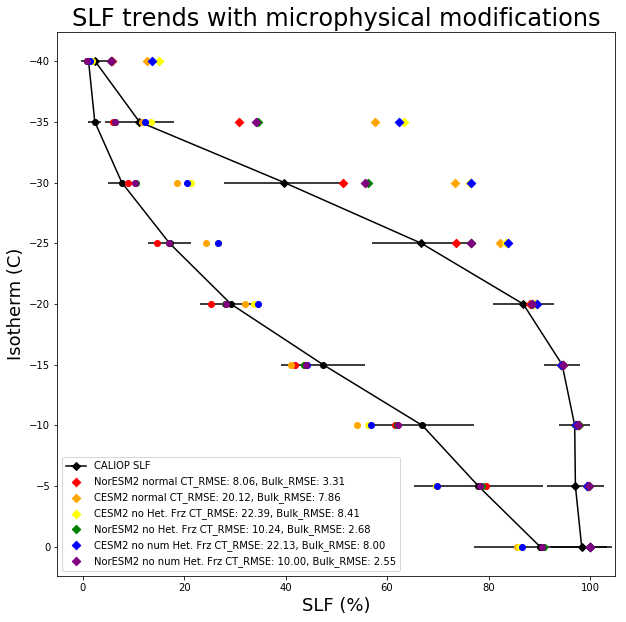

In [18]:
mainmetric.plot_isos_all()